# Importing Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Read and See some details about the Dataset

In [3]:
df=pd.read_csv("city_temperature.csv")
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_16020\2758382868.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("city_temperature.csv")


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [4]:
df.shape

(2906327, 8)

In [5]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
df.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [7]:
#Dropping the duplicate rows
df=df.drop_duplicates()

In [8]:
#see how null value exist in each column
df.isna().sum()

Region                  0
Country                 0
State             1448805
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [9]:
#fill the null values with not specified since they exist only on the state clumn
df=df.fillna("Not Specified")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885612 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 198.1+ MB


In [11]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.885612e+06,2.885612e+06,2.885612e+06,2.885612e+06
mean,6.469037e+00,1.571679e+01,2.006707e+03,5.601560e+01
std,3.456445e+00,8.800516e+00,1.965710e+01,3.215210e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.560000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [12]:
df.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [13]:
#Removing the rows that contains 200 and 201 in the year and contains 0 in the day
df =df[ (df['Year'] != 200) & (df['Year'] != 201) & (df['Day'] != 0) ]

In [14]:
#Transform the Average Temperature from Fahrenheit to Celsius
df["AvgTemperature"]=(df["AvgTemperature"]-32)*(5/9)

In [15]:
#add a datetime column to use it in plotting
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

In [16]:
#remove values that are less than -50 and year equal or greater than 2020 since there exists some random drops in it
df =df[(df['AvgTemperature'] >= -50) & (df['Year'] < 2020)]

# Counting the values of every Column

In [17]:
df["Region"].value_counts()

North America                        1508776
Europe                                361973
Asia                                  301754
Africa                                217714
South/Central America & Carribean     204063
Middle East                           119210
Australia/South Pacific                54405
Name: Region, dtype: int64

In [18]:
df["Country"].value_counts()

US                   1411827
Canada                 73698
China                  45470
Australia              45332
India                  36368
                      ...   
Serbia-Montenegro       3247
Sierra Leone            3064
Malawi                  2641
Guyana                  2136
Burundi                  884
Name: Country, Length: 125, dtype: int64

In [19]:
df["State"].value_counts()

Not Specified             1356068
Texas                      127544
Ohio                        63808
Florida                     60320
Pennsylvania                51267
California                  45561
New York                    45557
Michigan                    45421
Tennessee                   36451
Alabama                     36449
North Carolina              36437
Indiana                     36426
Georgia                     36414
Colorado                    36406
Illinois                    36400
Oregon                      36399
Louisiana                   33086
Alaska                      27354
Washington                  27347
Missouri                    27343
Virginia                    27333
Kansas                      27331
Kentucky                    27322
Nebraska                    27306
Wisconsin                   27293
Montana                     27275
Arizona                     25853
Nevada                      18232
Wyoming                     18230
Mississippi   

In [20]:
df["City"].value_counts()

Portland       18225
Charleston     18222
Columbus       18204
Springfield    18196
Fairbanks       9119
               ...  
Lilongwe        2641
Frankfurt       2331
Georgetown      2136
Bonn            1083
Bujumbura        884
Name: City, Length: 321, dtype: int64

In [21]:
df["Month"].value_counts()

3     235619
7     235456
1     235360
10    235095
8     234943
5     234889
12    233533
4     227675
9     227214
11    226871
6     226488
2     214752
Name: Month, dtype: int64

In [22]:
df["Day"].value_counts()

8     91173
22    91172
27    91169
26    91126
3     91106
2     91101
12    91081
15    91079
13    91065
14    91065
11    91043
5     91041
6     91036
7     91034
4     91023
23    91018
16    90993
9     90897
17    90896
28    90889
1     90882
20    90872
25    90815
10    90774
21    90721
19    90703
18    90570
24    90395
29    85327
30    83134
31    52695
Name: Day, dtype: int64

In [23]:
df["Year"].value_counts()

2001    114547
2005    114045
2004    113865
2003    113557
2006    113471
2000    113437
2002    112896
1999    112678
2010    112631
2007    112452
2009    112249
1997    112222
1996    112002
2008    111651
1995    111422
2011    111129
2012    110433
1998    110380
2013    109498
2014    107130
2015    106079
2017    105691
2016    105671
2018    104712
2019    104047
Name: Year, dtype: int64

In [24]:
df["AvgTemperature"].value_counts()

 26.777778    7343
 27.111111    7292
 26.222222    7162
 27.277778    7134
 26.944444    7125
              ... 
-38.277778       1
-36.555556       1
-40.611111       1
-40.444444       1
-39.166667       1
Name: AvgTemperature, Length: 1514, dtype: int64

# Plotting the Dataset

Plot by region
--

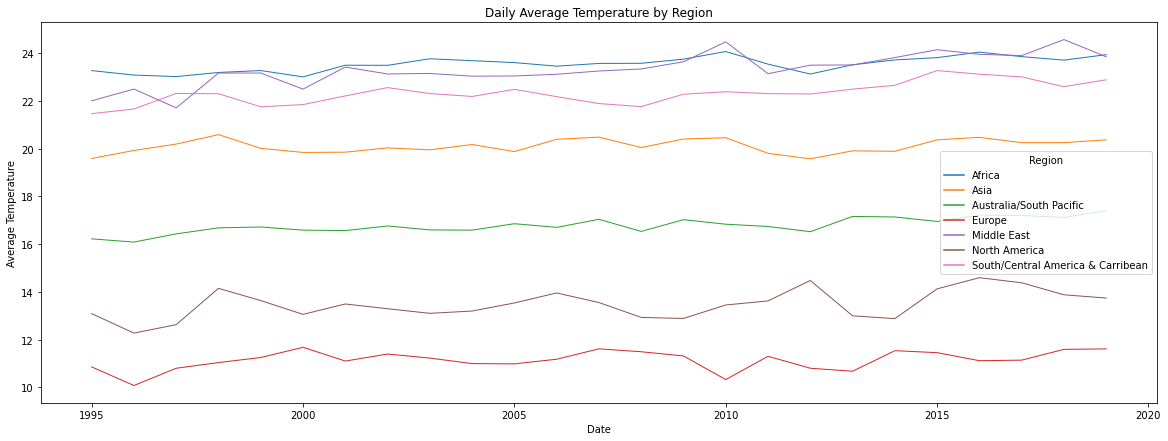

In [25]:

region = df[['Region', 'Year', 'AvgTemperature']].groupby(['Region', 'Year']).mean()
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Region', units = 'Region', markers = True, dashes = False, estimator = None, lw = 1, data = region)
plt.title("Daily Average Temperature by Region")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

The hottest Average Temperature in the Dataset
---

In [26]:

df.sort_values(by = ['AvgTemperature'], ascending  = False).head(1)

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
1034962,Middle East,Kuwait,Not Specified,Kuwait,8,1,2012,43.333333,2012-08-01


The coldest Average Temperature in the Dataset
---

In [27]:

df.sort_values(by = ['AvgTemperature'], ascending  = True).head(1)

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
1499140,North America,US,Alaska,Fairbanks,12,31,1999,-45.555556,1999-12-31


plotting by some cities
---

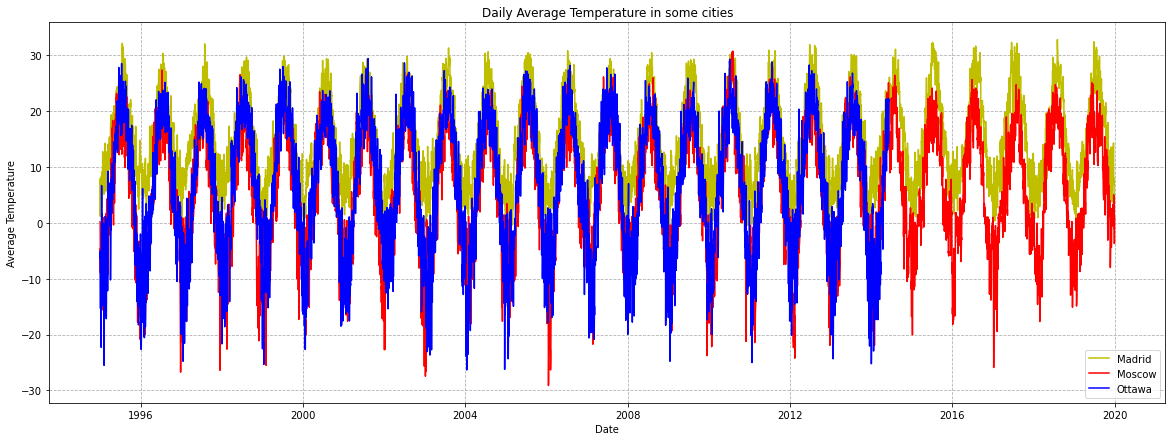

In [28]:

plt.figure(figsize = (20,7))
plt.plot(df['Date'][(df['City'] =="Madrid")], df['AvgTemperature'][(df['City'] =="Madrid")], 'y' ,label = 'Madrid')
plt.plot(df['Date'][(df['City'] =="Moscow")], df['AvgTemperature'][(df['City'] =="Moscow")], 'r' ,label = 'Moscow')
plt.plot(df['Date'][(df['City'] =="Ottawa")], df['AvgTemperature'][(df['City'] =="Ottawa")], 'b' ,label = 'Ottawa')
plt.grid(linestyle = '--')
plt.legend(["Madrid","Moscow","Ottawa"])
plt.title("Daily Average Temperature in some cities")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

plotting the temperature of every country in a region
---

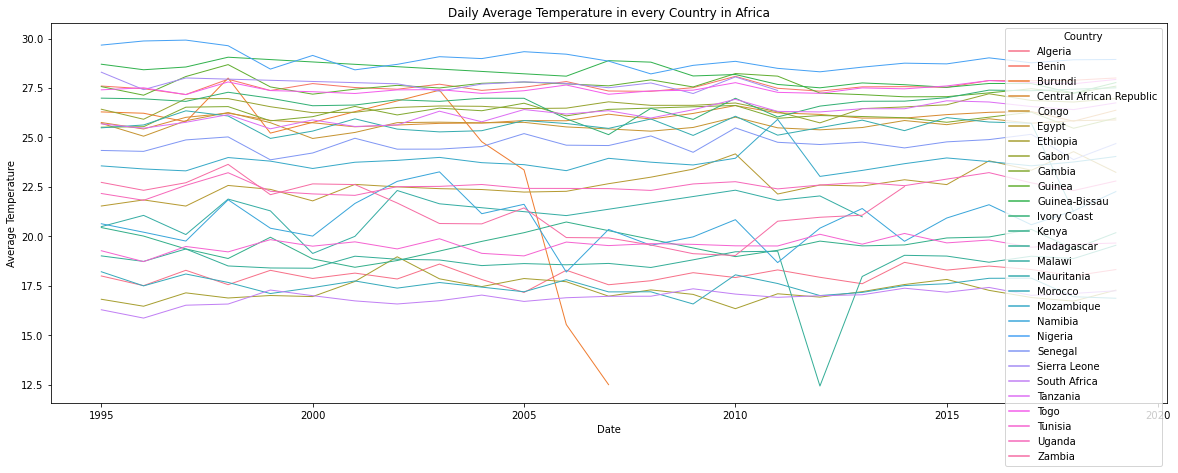

In [29]:

country1=df[["Country","Region","Year","AvgTemperature"]]
country2=country1[(country1['Region'] == "Africa") ]
country=country2.drop("Region",axis=1).groupby(['Country', 'Year']).mean()
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Country', units = 'Country', markers = True, dashes = False, estimator = None, lw = 1, data = country)
plt.title("Daily Average Temperature in every Country in Africa")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

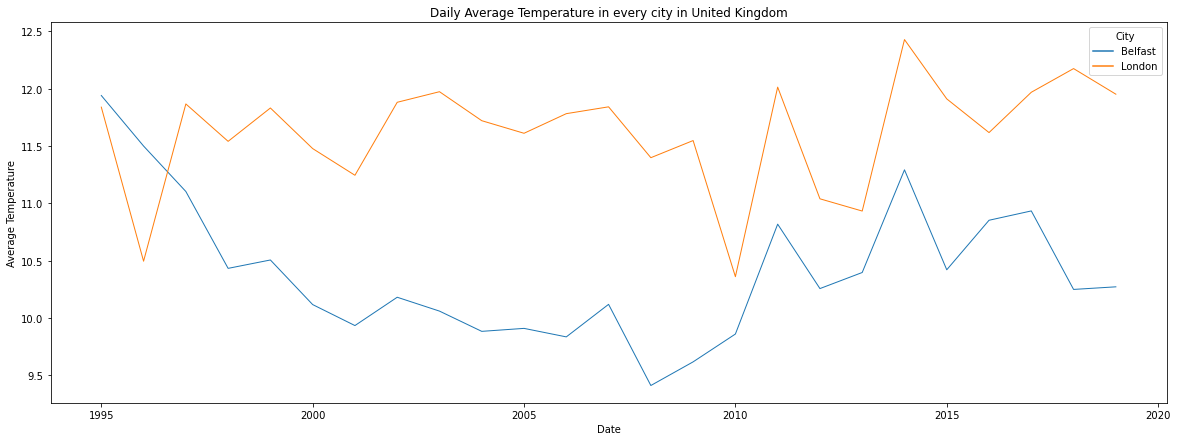

In [30]:
#plotting the temperature of every city in a country
city1=df[["Country","City","Year","AvgTemperature"]]
city2=city1[(city1['Country'] == "United Kingdom") ]
city=city2.drop("Country",axis=1).groupby(['City', 'Year']).mean()
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'City', units = 'City', markers = True, dashes = False, estimator = None, lw = 1, data = city)
plt.title("Daily Average Temperature in every city in United Kingdom")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

# Using Label Encoder (Transform non-numerical Data to numerical)

In [31]:
le=LabelEncoder()

In [32]:
#saving created dictionnaries to use them in plotting later
df["Region"]=le.fit_transform(df["Region"])
region = dict(zip(le.classes_, range(len(le.classes_))))
df["Country"]=le.fit_transform(df["Country"])
country = dict(zip(le.classes_, range(len(le.classes_))))
df["State"]=le.fit_transform(df["State"])
state = dict(zip(le.classes_, range(len(le.classes_))))
df["City"]=le.fit_transform(df["City"])
city = dict(zip(le.classes_, range(len(le.classes_))))

In [33]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,0,1,36,7,1,1,1995,17.888889,1995-01-01
1,0,1,36,7,1,2,1995,9.666667,1995-01-02
2,0,1,36,7,1,3,1995,9.333333,1995-01-03
3,0,1,36,7,1,4,1995,8.000000,1995-01-04
4,0,1,36,7,1,5,1995,8.833333,1995-01-05


# Split the Data into Train and Test

In [34]:
df.shape

(2767895, 9)

In [35]:
2767895*0.90

2491105.5

In [36]:
#sorting the values by date to split the data
df=df.sort_values(by="Date")

In [37]:
#80% train and 20% test
split=2491106
train=df[:split]
test=df[split:]

In [38]:
train.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,0,1,36,7,1,1,1995,17.888889,1995-01-01
2069204,5,114,23,123,1,1,1995,-0.500000,1995-01-01
2059939,5,114,23,113,1,1,1995,-0.388889,1995-01-01
2050674,5,114,23,96,1,1,1995,1.166667,1995-01-01
2041409,5,114,22,46,1,1,1995,3.611111,1995-01-01


In [39]:
test.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
2760430,5,114,45,310,12,31,2019,4.333333,2019-12-31
2309958,5,114,33,250,12,31,2019,2.555556,2019-12-31
831413,3,64,36,275,12,31,2019,-0.833333,2019-12-31
293857,1,20,36,269,12,31,2019,2.944444,2019-12-31
1979886,5,114,18,219,12,31,2019,5.055556,2019-12-31


In [40]:
X_train=train.drop(["AvgTemperature","Date"],axis=1).to_numpy()
y_train=train["AvgTemperature"].to_numpy()
X_test=test.drop(["AvgTemperature","Date"],axis=1).to_numpy()
y_test=test["AvgTemperature"].to_numpy()

In [41]:
print("X_train shape:"+str(X_train.shape)+"\ny_train shape:"+str(y_train.shape)+"\nX_test shape:"+str(X_test.shape)+"\ny_test shape:"+str(y_test.shape))

X_train shape:(2491106, 7)
y_train shape:(2491106,)
X_test shape:(276789, 7)
y_test shape:(276789,)


# XGBoost

In [42]:
xgbr=xgb.XGBRegressor(booster="dart",objective="reg:squarederror",n_estimators=151)

In [43]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=151, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
xgbrPredic=xgbr.predict(X_test)

In [45]:
print("Root Mean Squared Error (RMSE) score XGBoost:"+str(np.sqrt(mean_squared_error(y_test,xgbrPredic))))


Root Mean Squared Error (RMSE) score XGBoost:3.8601992844359025


In [46]:
r2 = r2_score(y_test, xgbrPredic)
print("R-squared score: {:.2f}".format(r2))

R-squared score: 0.86


# Plotting the Results

In [47]:
test["prediction"]=xgbrPredic

C:\Users\Admin\AppData\Local\Temp\ipykernel_16020\3106529746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"]=xgbrPredic


In [48]:
test.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date,prediction
2197813,5,114,28,168,5,10,2017,17.166667,2017-05-10,15.679811
711320,3,33,36,139,5,10,2017,1.055556,2017-05-10,9.291423
403015,1,60,36,38,5,10,2017,22.666667,2017-05-10,17.200560
1941861,5,114,17,294,5,10,2017,23.444444,2017-05-10,17.633835
2676080,5,114,45,85,5,10,2017,25.777778,2017-05-10,25.881491


In [49]:
df=df.merge(test[["prediction"]],how="left",left_index=True,right_index=True)

In [50]:
df.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date,prediction
2760430,5,114,45,310,12,31,2019,4.333333,2019-12-31,6.743941
2309958,5,114,33,250,12,31,2019,2.555556,2019-12-31,-0.381196
831413,3,64,36,275,12,31,2019,-0.833333,2019-12-31,0.962745
293857,1,20,36,269,12,31,2019,2.944444,2019-12-31,5.696105
1979886,5,114,18,219,12,31,2019,5.055556,2019-12-31,2.725681


In [51]:
df=df.set_index("Date")

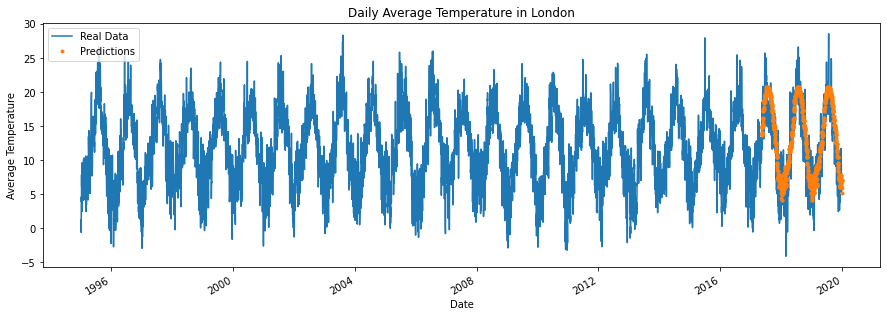

In [52]:
ax=df['AvgTemperature'][(df['City'] ==city["London"])].plot(figsize=(15,5))
df["prediction"][(df['City'] ==city["London"])].plot(ax=ax,style=".")
plt.legend(["Real Data","Predictions"])
ax.set_title("Daily Average Temperature in London")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

GRADING BOOSTING MACHINE
----

In [53]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [54]:
gbm.fit(X_train, y_train)





GradientBoostingRegressor(random_state=42)

In [55]:
y_pred = gbm.predict(X_test)


In [56]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 5.841273980934234


In [57]:
r2 = r2_score(y_test,y_pred)
print("R-squared score: {:.2f}".format(r2))

R-squared score: 0.69
